# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Visualisation du dataset

In [2]:
# importer le dataset dans le fichier
df = pd.read_csv("heart.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
df.sample()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
186,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172,1


In [8]:
type(df)

pandas.core.frame.DataFrame

### Shape du dataset

In [9]:
df.shape

(299, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


df.dtypes

## Pre-processing

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Exploratory data analysis

In [7]:

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###  Analyse du target

In [8]:
df["DEATH_EVENT"].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

### Corrélation entre le dataset et les features

In [14]:
print(df.corr()["DEATH_EVENT"].abs().sort_values(ascending=False))

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64


/home/huguette/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

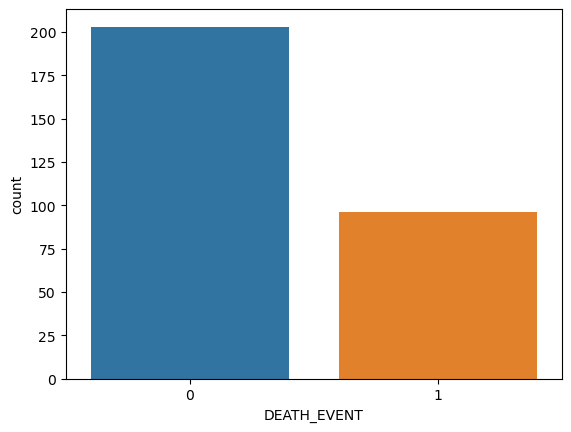

In [15]:
y = df["DEATH_EVENT"]
sns.countplot(y)

In [16]:
tmp = df["DEATH_EVENT"].value_counts()
print(tmp)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [17]:
print("Pourcentage du nombre de morts: "+str(round(tmp[1]*100/299,2)) )
print("Pourcentage du nombre de vivants: "+str(round(tmp[0]*100/299,2)) )

Pourcentage du nombre de morts: 32.11
Pourcentage du nombre de vivants: 67.89


### Matrice de corrélation

<AxesSubplot:>

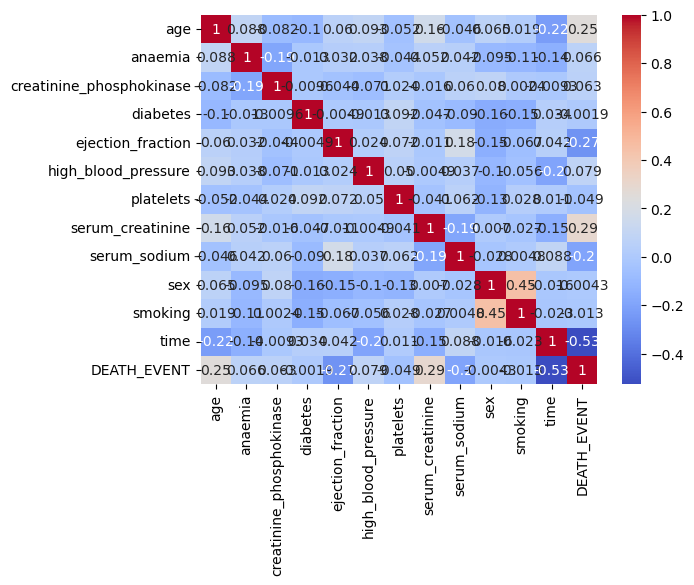

In [18]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

/home/huguette/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='DEATH_EVENT'>

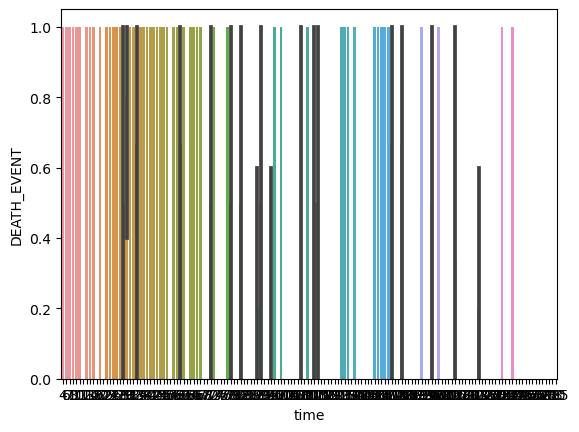

In [25]:
sns.barplot(df["time"],y)

/home/huguette/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

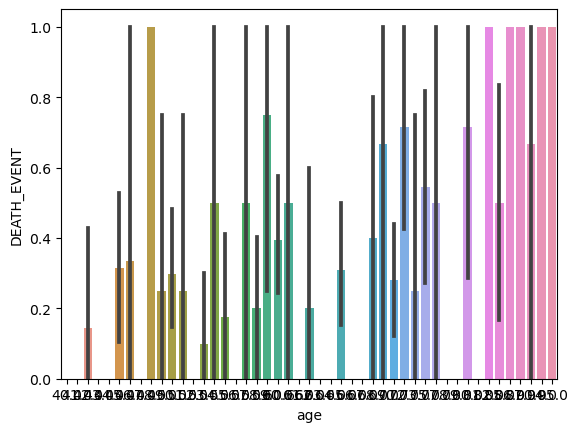

In [26]:
sns.barplot(df["age"],y)

## Séparation des données


In [38]:
from sklearn.model_selection import train_test_split
entry = df.drop("DEATH_EVENT", axis=1)
target = df["DEATH_EVENT"]

X_train, X_test, Y_train, Y_test = train_test_split(entry,target,test_size=0.20,random_state=42)


In [37]:
X_train.shape


(239, 12)

In [31]:
Y_train.shape

(239,)

In [32]:
X_test.shape

(60, 12)

In [33]:
Y_test.shape

(60,)

## Entrainement du modèle et évaluation du score

In [62]:
from sklearn.metrics import accuracy_score


###  Regression logistique

In [86]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr=lr.predict(X_test)

In [87]:
score_lr= round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("Le score est: "+str(score_lr))

Le score est: 80.0


## Naive bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb=nb.predict(X_test)

In [85]:
score_nb= round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("Le score est: "+str(score_nb))

Le score est: 73.33


## SVN

In [80]:
from sklearn  import svm
sv= svm.SVC(kernel="linear")
sv.fit(X_train, Y_train)
Y_pred_svm=sv.predict(X_test)

In [81]:
score_sv= round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("Le score est: "+str(score_sv))

Le score est: 75.0
